<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/unsupervised_learning/experiment_pca_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
sc=StandardScaler()

In [4]:
startdate='1995-01-01'

In [14]:
import yfinance as yf
df =yf.download('^nsei','2012-01-01')
X = df #np.array((df['Close'].pct_change(50)).dropna()) #  -df['Close'].rolling(window=200).mean()).dropna()
X=sc.fit_transform(X)
from sklearn.cluster import KMeans 
#from kneed import DataGenerator, KneeLocator

[*********************100%***********************]  1 of 1 completed


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','pcomponent 2'])

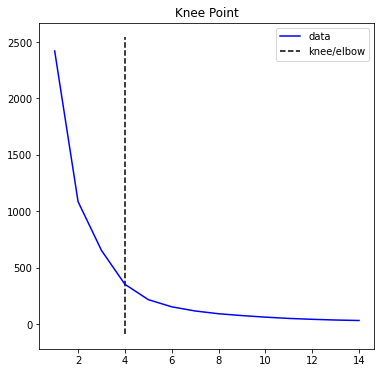

In [ ]:
'''
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
kn = KneeLocator(K, sum_of_squared_distances,S=1.0, curve="convex", direction="decreasing")
kn.plot_knee()
#plt.plot(sum_of_squared_distances)
'''

In [ ]:
#kn.knee

4

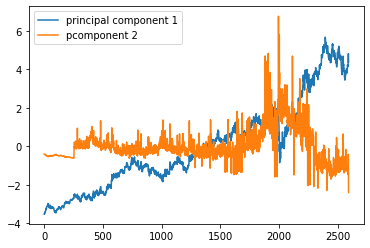

In [16]:
principalDf.plot();

In [38]:
X= principalDf['pcomponent 2'].values

In [ ]:
kmeans = KMeans(n_clusters= 4).fit(principalDf[['pcomponent 2']].values)
c = kmeans.predict(principalDf[['pcomponent 2']])
minmax = []
for i in range(4):
    minmax.append([-np.inf,np.inf])
for i in range(len(principalDf)):
    cluster = c[i]
    if X[i] > minmax[cluster][0]:
        minmax[cluster][0] = X[i]
    if X[i] < minmax[cluster][1]:
        minmax[cluster][1] = X[i]

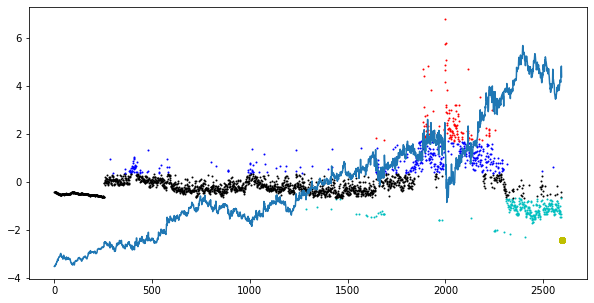

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(principalDf['principal component 1'])
for i in range(len(X[:])):
    colors = ['b','k','r','c']
    c = kmeans.predict(X[i].reshape(-1,1))[0]
    color = colors[c]
    plt.scatter(i,X[i],c = color,s = 1)
    plt.scatter(len(X)-1,X[len(X)-1],c='y')

In [ ]:
sc.inverse_transform(X[[-1]])

In [ ]:
df['cluster']=c

In [ ]:
df_new=df[-300:].copy()
X_new=X[-300:]

In [ ]:
plt.figure(figsize=(10,5))
for i in range(len(df_new)):
    colors = ['b','k','r','c']
    c = kmeans.predict(X_new[i].reshape(-1,1))[0]
    color = colors[c]
    
    plt.scatter(i,df_new['Close'].iloc[i],c = color,s =10)
df_new['Close'].reset_index(drop=True).plot(color='y'); 
plt.savefig('cluster_image.png')

In [ ]:
df_new['Close'].plot()

In [ ]:
'''    
for i in range(len(minmax)):
    plt.hlines(minmax[i][0],xmin = 0,xmax = len(X),colors = 'g')
    plt.hlines(minmax[i][1],xmin = 0,xmax = len(X),colors = 'r')
'''    